In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [2]:
data = pd.read_excel('C:/Users/manu/OneDrive/Documents/spin/walmart Retail Data.xlsx')

In [3]:
data.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [5]:
data.shape

(8399, 25)

In [6]:
df=data[['Order Date','Sales']]

In [7]:
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.sort_values('Order Date', inplace=True)

In [9]:
monthly_sales = data.resample('ME', on='Order Date')['Sales'].sum().reset_index() 

In [10]:
monthly_sales.head()

,Order Date,Sales
0,2012-01-31,516302.9595
1,2012-02-29,332480.6365
2,2012-03-31,411628.7290
3,2012-04-30,393276.4820
4,2012-05-31,230145.5380


In [11]:
prophet_data = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [13]:
split_point = int(len(prophet_data) * 0.8)  # 80% for training
train_data = prophet_data.iloc[:split_point]
test_data = prophet_data.iloc[split_point:]

In [14]:
# Display the range of dates for training and testing sets
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())
print(f"Training Date Range: {train_date_range}")
print(f"Testing Date Range: {test_date_range}")


Training Date Range: (Timestamp('2012-01-31 00:00:00'), Timestamp('2015-02-28 00:00:00'))
Testing Date Range: (Timestamp('2015-03-31 00:00:00'), Timestamp('2015-12-31 00:00:00'))


In [15]:
train_date_range

(Timestamp('2012-01-31 00:00:00'), Timestamp('2015-02-28 00:00:00'))

In [16]:
test_date_range

(Timestamp('2015-03-31 00:00:00'), Timestamp('2015-12-31 00:00:00'))

In [18]:
pip install prophet

In [20]:
from prophet import Prophet
# Initialize and fit the Prophet model
model = Prophet(seasonality_mode='multiplicative')
model.fit(prophet_data)

17:31:35 - cmdstanpy - INFO - Chain [1] start processing
17:31:35 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast 12 months into the future

C:\Users\manu\anaconda3\New folder\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [22]:
# Generate forecast
forecast = model.predict(future)

In [23]:
# Display the forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

           ds           yhat     yhat_lower     yhat_upper
55 2016-08-31  247003.964756  196937.707032  300553.609203
56 2016-09-30  318251.765225  265061.938410  374625.025596
57 2016-10-31  324666.185840  271606.654244  378657.937309
58 2016-11-30  254392.245796  200568.190351  305383.622814
59 2016-12-31  371008.148916  316767.436578  425618.597873


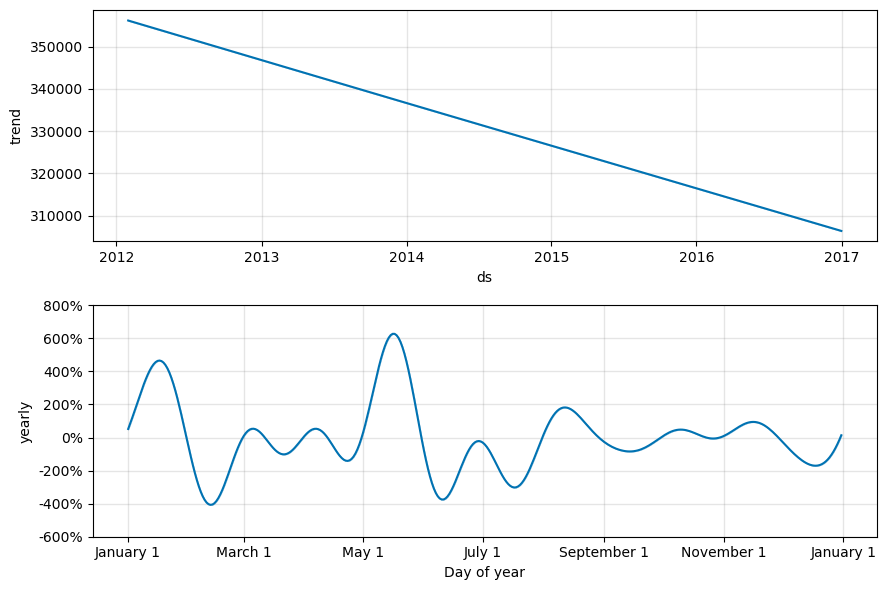

In [24]:
fig = model.plot_components(forecast)
plt.show()


C:\Users\manu\AppData\Local\Temp\ipykernel_12412\3854642000.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


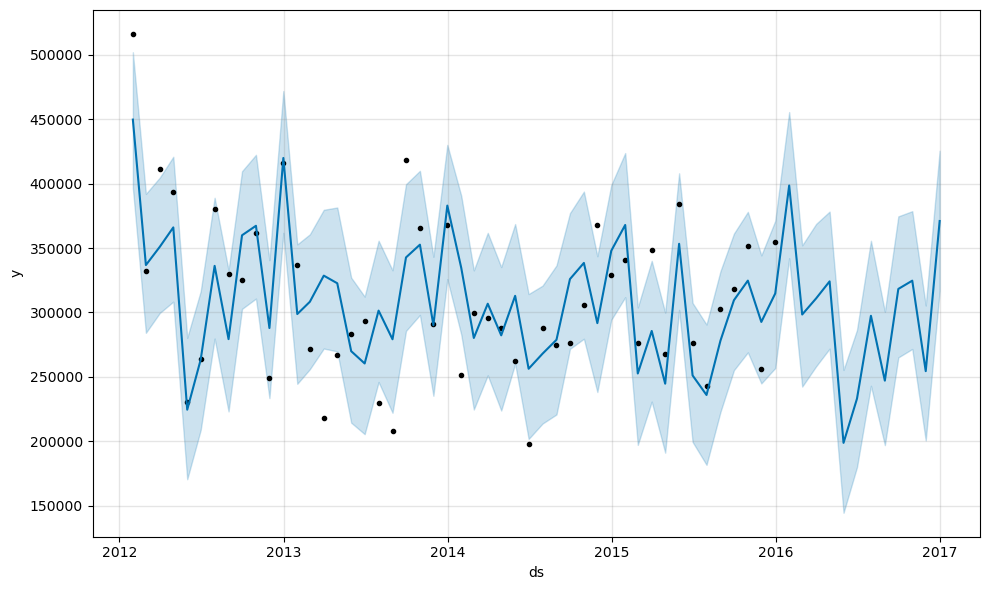

In [25]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components (trend, seasonality)
# fig_components = model.plot_components(forecast)
# fig_components.show()


In [26]:
pip install streamlit

In [31]:
from joblib import dump

In [33]:
dump(model,"prophet_sales_predict.joblib")

['prophet_sales_predict.joblib']